In [693]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [694]:
def random_explore():
    return 50

def return_to_base_alone(ally_dist, base_dist):
    ally_factor = -50 * np.clip(10 - ally_dist, 0, 5)
    base_factor = 50 * np.clip(base_dist - 10, 0, 5)
    return np.clip(ally_factor + base_factor, 0, None)

def return_to_base_flee(enemy_dist, base_dist):
    enemy_factor = np.clip(14 - 2 * enemy_dist, 0, 5)
    base_factor = np.log(np.clip(base_dist - 4, 1, None))
    return 10 * enemy_factor * base_factor

def attack(enemy_dist, base_dist):
    enemy_factor = 25 * (7 - enemy_dist)
    base_factor = -0.25 * np.exp(base_dist - 2)
    return np.clip(125 + enemy_factor + base_factor, 0, None)

BASE  = np.arange(0, 50, 0.25)
ALLY  = np.arange(0, 50, 0.25)
ENEMY = np.arange(0, 50, 0.25)

def ShowGraphs(X, Y, x_name, y_name, utility_func, utility_names, title):
    N = utility_names.shape[0]

    img = np.zeros((X.shape[0], Y.shape[0]))
    ht = np.zeros((N, X.shape[0], Y.shape[0]))
    
    for x, val_x in enumerate(X):
        for y, val_y in enumerate(Y):
            utility = utility_func(val_x, val_y)

            for i in range(utility.shape[0]):
                ht[i][y][x] = utility[i]
            img[y][x] = np.argmax(utility)


    _, ax = plt.subplots()
    im = ax.imshow(img, extent=[0, 50, 0, 50], origin='lower')
    ax.set_title(title)
    ax.set_aspect('auto')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)

    plt.colorbar(im)

    for i in range(N):
        _, ax = plt.subplots()
        im = ax.imshow(ht[i], extent=[0, 50, 0, 50], origin='lower', cmap='Greys')
        ax.set_title(utility_names[i])
        ax.set_aspect('auto')
        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        plt.colorbar(im)

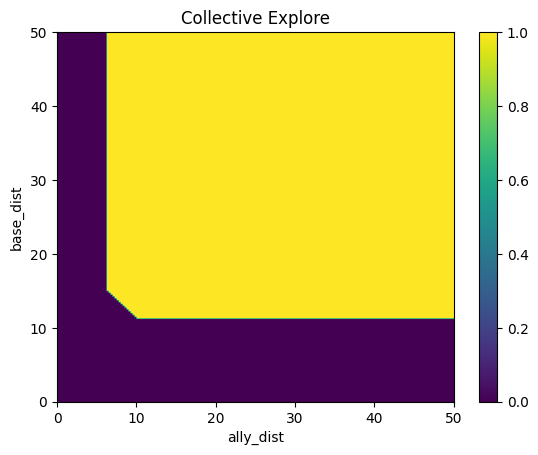

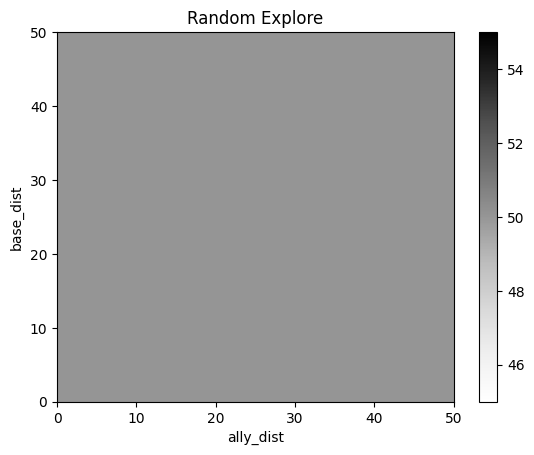

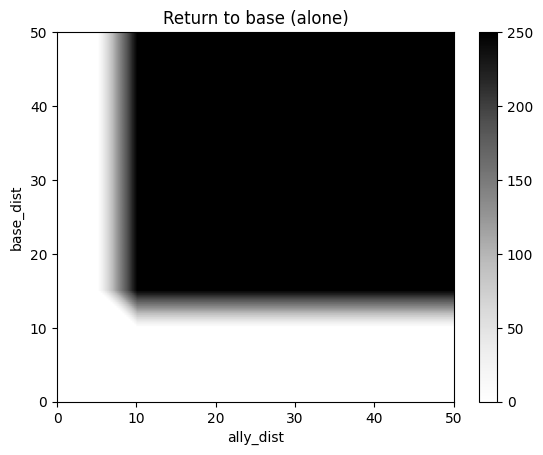

In [695]:
# 0.0 - Random Explore
# 1.0 - Return to base (alone)
utility_func = lambda x, y: np.array([random_explore(), return_to_base_alone(x, y)])
ShowGraphs(ALLY, BASE, "ally_dist", "base_dist", utility_func, np.array(["Random Explore", "Return to base (alone)"]), "Collective Explore")

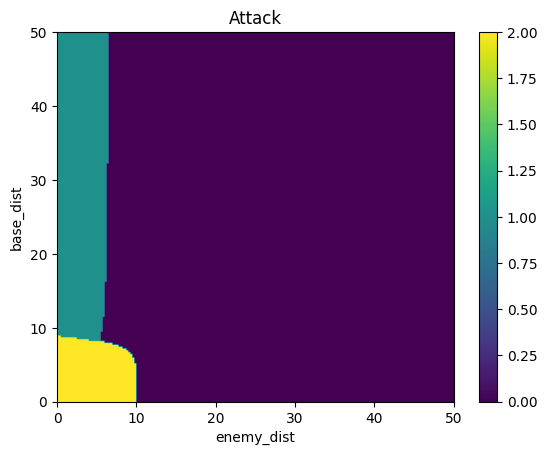

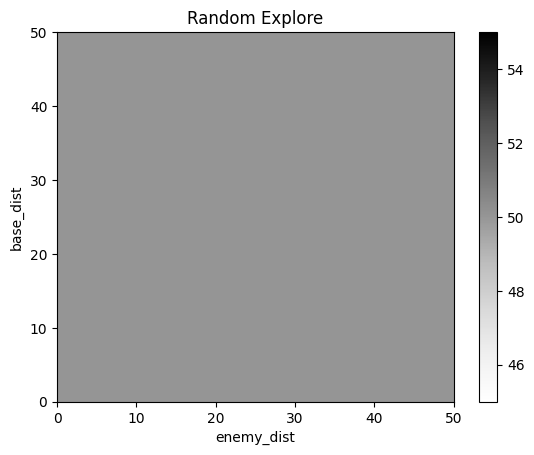

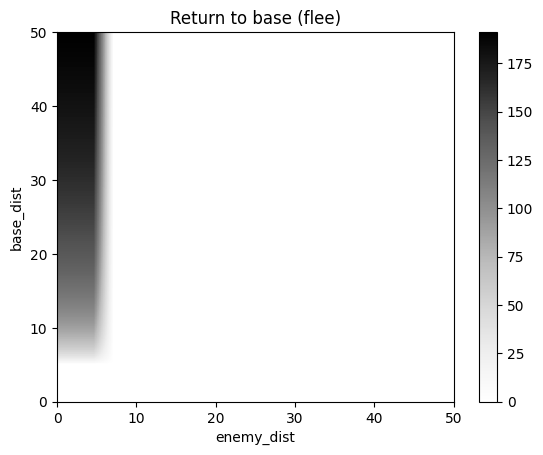

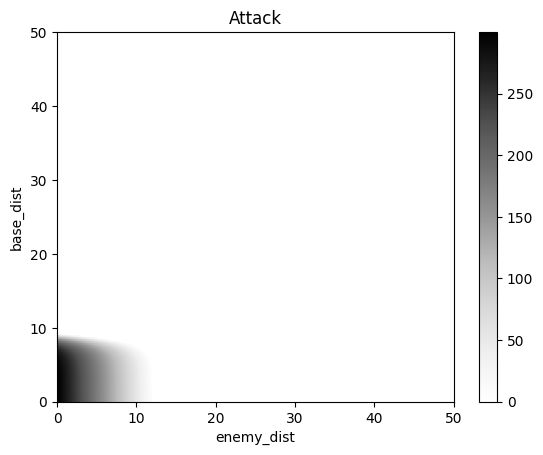

In [696]:
# 0.0 - Random Explore
# 1.0 - Return to base (flee)
# 2.0 - Attack
utility_func = lambda x, y: np.array([random_explore(), return_to_base_flee(x, y), attack(x, y)])
ShowGraphs(ALLY, BASE, "enemy_dist", "base_dist", utility_func, np.array(["Random Explore", "Return to base (flee)", "Attack"]), "Attack")

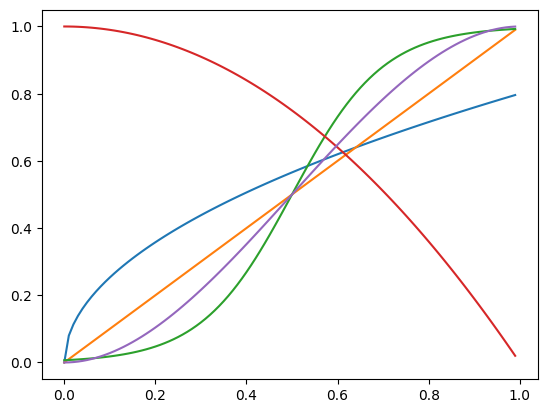

In [697]:
X = np.arange(0, 1, 0.01)
plt.plot(X, (X ** 0.5) * 0.8)
plt.plot(X, X)
plt.plot(X, 1 / (1 + np.exp(-(X * 10 - 5))))
plt.plot(X, 1 - X ** 2)
plt.plot(X, -2 * X ** 3 + 3 * X ** 2)